AAS - Timeseries: Read in and Manipulate Time Series in Astropy Demo

In [1]:
>>> from astropy.utils.data import get_pkg_data_filename
>>> filename = get_pkg_data_filename('timeseries/kplr010666592-2009131110544_slc.fits')  

In [2]:
>>> from astropy.timeseries import TimeSeries
>>> ts = TimeSeries.read(filename, format='kepler.fits')  

In [3]:
>>> ts  

time,timecorr,cadenceno,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,sap_quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,d,,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
object,float32,int32,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
2009-05-02T00:41:40.338,6.630610e-04,5500,1.0270451e+06,1.4041933e+02,3.7480554e+03,2.2283568e+00,1.0346376e+06,2.4780812e+02,0,nan,nan,nan,nan,1041.56040,1.3623475e-04,613.47997,1.7336856e-04,1.5822421e-03,-1.4463664e-03
2009-05-02T00:42:39.188,6.630857e-04,5501,1.0271844e+06,1.4042902e+02,3.7491572e+03,2.2283657e+00,1.0347789e+06,2.4594159e+02,0,nan,nan,nan,nan,1041.55834,1.3624557e-04,613.48164,1.7334183e-04,1.5743829e-03,-1.4540013e-03
2009-05-02T00:43:38.045,6.631103e-04,5502,1.0270762e+06,1.4038968e+02,3.7502588e+03,2.2283745e+00,1.0346701e+06,2.4408449e+02,0,nan,nan,nan,nan,1041.55751,1.3616899e-04,613.47866,1.7328140e-04,1.5665225e-03,-1.4616371e-03
2009-05-02T00:44:36.894,6.631350e-04,5503,1.0271414e+06,1.4042482e+02,3.7513606e+03,2.2283831e+00,1.0347365e+06,2.4229922e+02,0,nan,nan,nan,nan,1041.55898,1.3622017e-04,613.47947,1.7331526e-04,1.5586632e-03,-1.4692718e-03
2009-05-02T00:45:35.752,6.631597e-04,5504,1.0271569e+06,1.4039404e+02,3.7524626e+03,2.2283916e+00,1.0347527e+06,2.4051416e+02,0,nan,nan,nan,nan,1041.55705,1.3621294e-04,613.48085,1.7329821e-04,1.5508028e-03,-1.4769078e-03
2009-05-02T00:46:34.601,6.631844e-04,5505,1.0272296e+06,1.4043083e+02,3.7535642e+03,2.2284005e+00,1.0348268e+06,2.3879796e+02,0,nan,nan,nan,nan,1041.55916,1.3619773e-04,613.47844,1.7329390e-04,1.5429436e-03,-1.4845425e-03
2009-05-02T00:47:33.451,6.632091e-04,5506,1.0273199e+06,1.4040657e+02,3.7546660e+03,2.2284091e+00,1.0349186e+06,2.3708369e+02,0,nan,nan,nan,nan,1041.55680,1.3621902e-04,613.47908,1.7324935e-04,1.5350844e-03,-1.4921773e-03
2009-05-02T00:48:32.291,6.632337e-04,5507,1.0271497e+06,1.4042722e+02,3.7557673e+03,2.2284179e+00,1.0347472e+06,2.3542677e+02,0,nan,nan,nan,nan,1041.55869,1.3619712e-04,613.47893,1.7332737e-04,1.5272264e-03,-1.4998110e-03


In [4]:
>>> ts['time', 'sap_flux'] 
>>> ts[0:4]

time,timecorr,cadenceno,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,sap_quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,d,,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
object,float32,int32,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
2009-05-02T00:41:40.338,6.630610e-04,5500,1.0270451e+06,1.4041933e+02,3.7480554e+03,2.2283568e+00,1.0346376e+06,2.4780812e+02,0,nan,nan,nan,nan,1041.56040,1.3623475e-04,613.47997,1.7336856e-04,1.5822421e-03,-1.4463664e-03
2009-05-02T00:42:39.188,6.630857e-04,5501,1.0271844e+06,1.4042902e+02,3.7491572e+03,2.2283657e+00,1.0347789e+06,2.4594159e+02,0,nan,nan,nan,nan,1041.55834,1.3624557e-04,613.48164,1.7334183e-04,1.5743829e-03,-1.4540013e-03
2009-05-02T00:43:38.045,6.631103e-04,5502,1.0270762e+06,1.4038968e+02,3.7502588e+03,2.2283745e+00,1.0346701e+06,2.4408449e+02,0,nan,nan,nan,nan,1041.55751,1.3616899e-04,613.47866,1.7328140e-04,1.5665225e-03,-1.4616371e-03
2009-05-02T00:44:36.894,6.631350e-04,5503,1.0271414e+06,1.4042482e+02,3.7513606e+03,2.2283831e+00,1.0347365e+06,2.4229922e+02,0,nan,nan,nan,nan,1041.55898,1.3622017e-04,613.47947,1.7331526e-04,1.5586632e-03,-1.4692718e-03


In [5]:
>>> ts.time.jd

array([2454953.5289391 , 2454953.52962023, 2454953.53030145, ...,
       2454963.2536398 , 2454963.25432093, 2454963.25500215])

Text(0, 0.5, 'SAP Flux (e-/s)')

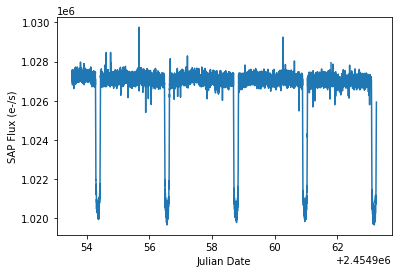

In [6]:
import matplotlib.pyplot as plt
plt.plot(ts.time.jd, ts['sap_flux'], markersize=1)
plt.xlabel('Julian Date')
plt.ylabel('SAP Flux (e-/s)')

We now take a look at how to make an interactive figure of this lightcurve. To initialize a figure, use the InteractiveTimeSeriesFigure class:

In [7]:
from aas_timeseries import InteractiveTimeSeriesFigure
fig = InteractiveTimeSeriesFigure()

In [8]:
markers = fig.add_markers(time_series=ts, column='sap_flux', label='SAP Flux')
#The first argument is the whole time series object
#the second is the name of the column to use for the specific markers
#the latter is used in the legend of the plot.
fig.xlabel = 'Time (UTC)'
fig.ylabel = 'Flux (electron/s)'

In [9]:
fig.preview_interactive()

TimeSeriesWidget(vega_json='{\n  "$schema": "https://vega.github.io/schema/vega/v4.json",\n  "_extend": {\n   …